# Reading Date

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
star_wars = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')

# Data examination

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data Cleaning

In [4]:
res_bool = star_wars['RespondentID'].notnull()
star_wars = star_wars[res_bool]

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

# Convert value to True or False

In [7]:
yes_no = {'Yes': True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
lst = list(star_wars.iloc[0,3:9])
lst

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [12]:
seen_no = {np.nan:False}
for i in range(6):
    seen_no[lst[i]] = True
seen_no

{nan: False,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode V The Empire Strikes Back': True}

In [13]:
cols = list(star_wars.columns[3:9])
cols

['Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [14]:
for i in range(6):
    star_wars[cols[i]]=star_wars[cols[i]].map(seen_no)

# Convert column name to seen_

In [15]:
for i in range(1,7):
    star_wars = star_wars.rename(columns={cols[i-1]:'seen_'+str(i)})

In [16]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

# Convert column 9 to 14 to float type and change column names

In [17]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [18]:
cols_1 = list(star_wars.columns[9:15])
cols_1

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14']

In [19]:
for i in range(1,7):
    star_wars = star_wars.rename(columns={cols_1[i-1]:'ranking_'+str(i)})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Ranking plot

In [20]:
ranking = star_wars.iloc[:,9:15].mean()
ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

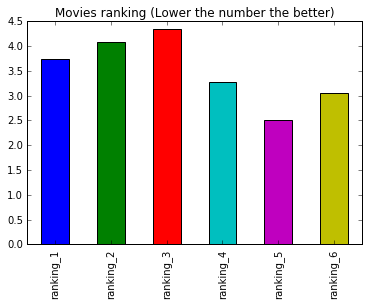

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
ranking_plot = ranking.plot.bar()
ranking_plot.set_title('Movies ranking (Lower the number the better)')
# The lower the number the better

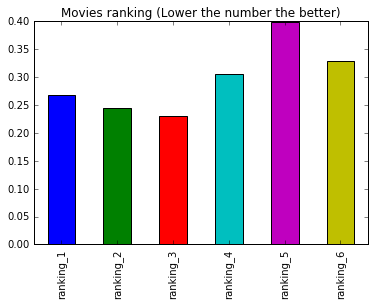

In [22]:
ranking_flip = 1/ranking
ranking_flip_plot = ranking_flip.plot.bar()
ranking_flip_plot.set_title('Movies ranking (Lower the number the better)')

Observation: I conclude that ranking_5 is the most favorate movie in Star Wars series. The name of the movie is Star Wars: Episode V The Empire Strikes Back.
ranking 3 has the lowest ranking and the name of the movie is Star Wars: Episode III Revenge of the Sith.

# Seen plot

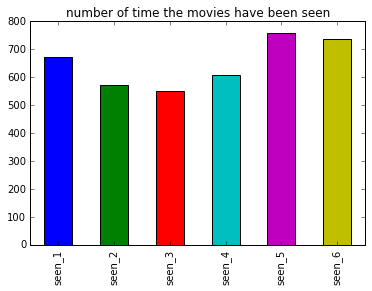

In [23]:
seen = star_wars.iloc[:,3:9].sum()
seen_plot= seen.plot.bar()
seen_plot.set_title('number of time the movies have been seen')

In [24]:
seen_list = seen.values
ranking_flip_list = ranking_flip.values
corr_data = pd.DataFrame(
    {'seen': seen_list,
    'ranking_flip':ranking_flip_list})
corr_data

,ranking_flip,seen
0,0.267886,673
1,0.244659,571
2,0.230345,550
3,0.305556,607
4,0.397906,758
5,0.328100,738


In [25]:
corr_data.corr()

,ranking_flip,seen
ranking_flip,1.000000,0.864822
seen,0.864822,1.000000


Base on the plots and corr_data table, it is clearly showing that a Star Wars movie with more viewers, the higher the movie ranking is.

# Plot base on different group of people

In [26]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fan_star_wars = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fan_star_wars = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
fan_star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
non_fan_star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

# Gender based analysis:

In [27]:
males_ranking = males.iloc[:,9:15].mean()
males_ranking_flip = 1/males_ranking
females_ranking = females.iloc[:,9:15].mean()
females_ranking_flip = 1/females_ranking

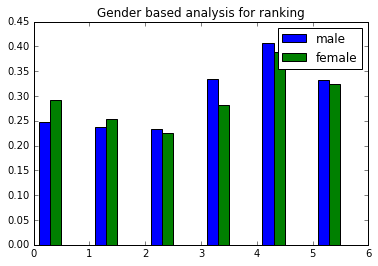

In [28]:
bar_positions = np.arange(6)
ax1 = plt.subplot()
ax1.bar(bar_positions+0.2,males_ranking_flip,0.2,color='b',align='center')
ax1.bar(bar_positions+0.4,females_ranking_flip,0.2,color='g',align='center')
gender_legend = ['male','female']
ax1.legend(gender_legend)
ax1.set_title('Gender based analysis for ranking')

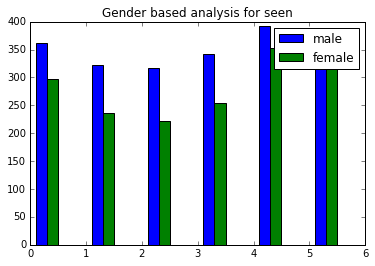

In [29]:
males_seen = males.iloc[:,3:9].sum()
females_seen = females.iloc[:,3:9].sum()
bar_positions = np.arange(6)
ax2 = plt.subplot()
ax2.bar(bar_positions+0.2,males_seen,0.2,color='b',align='center')
ax2.bar(bar_positions+0.4,females_seen,0.2,color='g',align='center')
gender_legend = ['male','female']
ax2.legend(gender_legend)
ax2.set_title('Gender based analysis for seen')

Base on the obervasion for the plots above, males are majority of fan of the STAR Wars movies. Both male and female have the similar partern from total population.

# Star Wars fan based analysis:

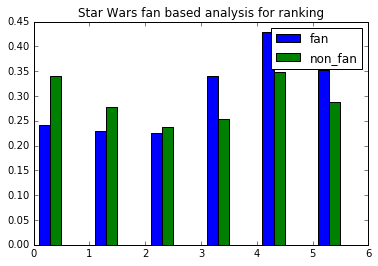

In [30]:
fan_star_wars_ranking = fan_star_wars.iloc[:,9:15].mean()
non_fan_star_wars_ranking = non_fan_star_wars.iloc[:,9:15].mean()
fan_star_wars_ranking_flip = 1/fan_star_wars_ranking
non_fan_star_wars_ranking_flip = 1/non_fan_star_wars_ranking

bar_positions = np.arange(6)
ax3 = plt.subplot()
ax3.bar(bar_positions+0.2,fan_star_wars_ranking_flip,0.2,color='b',align='center')
ax3.bar(bar_positions+0.4,non_fan_star_wars_ranking_flip,0.2,color='g',align='center')
legend = ['fan','non_fan']
ax3.legend(legend)
ax3.set_title('Star Wars fan based analysis for ranking')

Fans of Star Wars seem to rank movie 5 in a very high rank. I think becasue of movie 5, they become the fan of Star War movie.
Non fans of Star Wars seem to rank movie 1 and movie 5 in a similar ranking.
Therefore movie 5 is the key for this Star Wars movie series.

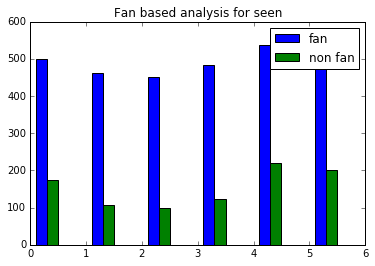

In [31]:
fan_star_wars_seen = fan_star_wars.iloc[:,3:9].sum()
non_fan_star_wars_seen = non_fan_star_wars.iloc[:,3:9].sum()

bar_positions = np.arange(6)
ax4 = plt.subplot()
ax4.bar(bar_positions+0.2,fan_star_wars_seen,0.2,color='b',align='center')
ax4.bar(bar_positions+0.4,non_fan_star_wars_seen,0.2,color='g',align='center')
legend = ['fan','non fan']
ax4.legend(legend)
ax4.set_title('Fan based analysis for seen')

This plot is very obvious that fans have much higher seen than non fan. However, even the total seen number is different, the pattern for seen is still silimar.

# Fan of Star Trek based analysis:

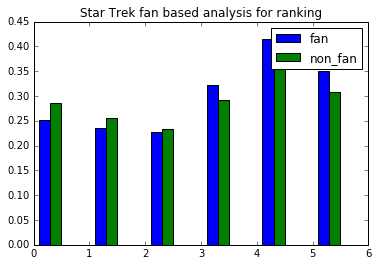

In [32]:
fan_star_trek_ranking = fan_star_trek.iloc[:,9:15].mean()
non_fan_star_trek_ranking = non_fan_star_trek.iloc[:,9:15].mean()
fan_star_trek_ranking_flip = 1/fan_star_trek_ranking
non_fan_star_trek_ranking_flip = 1/non_fan_star_trek_ranking

bar_positions = np.arange(6)
ax5 = plt.subplot()
ax5.bar(bar_positions+0.2,fan_star_trek_ranking_flip,0.2,color='b',align='center')
ax5.bar(bar_positions+0.4,non_fan_star_trek_ranking_flip,0.2,color='g',align='center')
legend = ['fan','non_fan']
ax5.legend(legend)
ax5.set_title('Star Trek fan based analysis for ranking')

Similar ranking

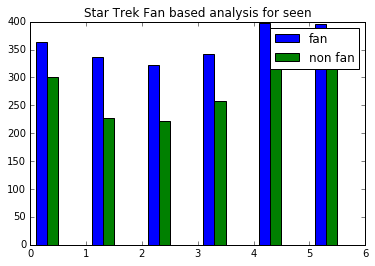

In [33]:
fan_star_trek_seen = fan_star_trek.iloc[:,3:9].sum()
non_fan_star_trek_seen = non_fan_star_trek.iloc[:,3:9].sum()

bar_positions = np.arange(6)
ax6 = plt.subplot()
ax6.bar(bar_positions+0.2,fan_star_trek_seen,0.2,color='b',align='center')
ax6.bar(bar_positions+0.4,non_fan_star_trek_seen,0.2,color='g',align='center')
legend = ['fan','non fan']
ax6.legend(legend)
ax6.set_title('Star Trek Fan based analysis for seen')

Thing that suprises me is that most Star Trek fans actually have seen Star Wars.  The number of seen from fan is still higher than the non fans.
According to the data, I can conclude that people either into Star Wars and Star Trek type of movie or not into them. People who love this type of movie would watch both series.